> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - Medical Appointment No Shows


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This dataset collects information from 100k medical appointments in Brazil . It is focused on patients showing up in their appointment or not. Data includes number of columns and characteristics as the following :
    PatientId : indicates the patient ID          
    AppointmentID :  indicates the appointement ID.         
    Gender : indicates the patient Gender.                 
    ScheduledDay : indicates the data and time where the patient schudle the appointement   
    AppointmentDay : indicates the appointement data and time .
    Age : indicates the age of the patient.                      
    Neighbourhood : indicates the Neighbourhood where the paitient lives.           
    Scholarship : indicates if the paitient have medical insurance or not.        
    Hypertension : indiactes if the patient have Hypertension or not.           
    Diabetes :  indiactes if the patient have Diabetes or not.           
    Alcoholism : indiactes if the patient is Alcoholism or not.                 
    Handcap :  indiactes if the patient is Handcap or not.                   
    SMSReceived :  indiactes if the patient received a reminder SMS message or not.             
    NoShow : indicates if the patient shows on their appointement or not .         

### Question(s) for Analysis
> In this Project we are going to Answer the following Question :
- What is the overall No_Show appointements rate based on gender?
- What is the most committed age range to attend appointments?

### Import the libraries we need to run the code

In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\HudaALAttasJEDSA\anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\HudaALAttasJEDSA\\AppData\\Local\\Temp\\pip-install-zlovnfdt\\pandas_29e0032c7e1e4228bedb68edeff0903d\\setup.py'"'"'; __file__='"'"'C:\\Users\\HudaALAttasJEDSA\\AppData\\Local\\Temp\\pip-install-zlovnfdt\\pandas_29e0032c7e1e4228bedb68edeff0903d\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\HudaALAttasJEDSA\AppData\Local\Temp\pip-wheel-bhdihno8'
       cwd: C:\Users\HudaALAttasJEDSA\AppData\Local\Temp\pip-install-zlovnfdt\pandas_29e0032c7e1e4228bedb68edeff0903d\
  Complete output (909 lines):
  C:\Users\HudaALAttasJEDSA\AppData\Local\Temp\pip-install-zl


  Running setup.py clean for pandas
Failed to build pandas
  Attempting uninstall: pandas
    Found existing installation: pandas 1.4.2
    Uninstalling pandas-1.4.2:
      Successfully uninstalled pandas-1.4.2
    Running setup.py install for pandas: started
    Running setup.py install for pandas: still running...
    Running setup.py install for pandas: still running...
    Running setup.py install for pandas: finished with status 'error'
  Rolling back uninstall of pandas
  Moving to c:\users\hudaalattasjedsa\anaconda3\lib\site-packages\pandas-1.4.2.dist-info\
   from C:\Users\HudaALAttasJEDSA\anaconda3\Lib\site-packages\~andas-1.4.2.dist-info
  Moving to c:\users\hudaalattasjedsa\anaconda3\lib\site-packages\pandas\
   from C:\Users\HudaALAttasJEDSA\anaconda3\Lib\site-packages\~andas


  copying pandas\errors\__init__.py -> build\lib.win-amd64-3.9\pandas\errors
  creating build\lib.win-amd64-3.9\pandas\io
  copying pandas\io\api.py -> build\lib.win-amd64-3.9\pandas\io
  copying pandas\io\clipboards.py -> build\lib.win-amd64-3.9\pandas\io
  copying pandas\io\common.py -> build\lib.win-amd64-3.9\pandas\io
  copying pandas\io\date_converters.py -> build\lib.win-amd64-3.9\pandas\io
  copying pandas\io\feather_format.py -> build\lib.win-amd64-3.9\pandas\io
  copying pandas\io\gbq.py -> build\lib.win-amd64-3.9\pandas\io
  copying pandas\io\gcs.py -> build\lib.win-amd64-3.9\pandas\io
  copying pandas\io\html.py -> build\lib.win-amd64-3.9\pandas\io
  copying pandas\io\packers.py -> build\lib.win-amd64-3.9\pandas\io
  copying pandas\io\parquet.py -> build\lib.win-amd64-3.9\pandas\io
  copying pandas\io\parsers.py -> build\lib.win-amd64-3.9\pandas\io
  copying pandas\io\pickle.py -> build\lib.win-amd64-3.9\pandas\io
  copying pandas\io\pytables.py -> build\lib.win-amd64-3.9\pa

<a id='wrangling'></a>
## Data Wrangling






### Read the data

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv("C:/Users/HudaALAttasJEDSA/Documents/Project 2 Udacity python/archive/KaggleV2-May-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No



### Data Cleaning


> Inspect the data

In [4]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


> Convert AppointmentDay and ScheduledDay from String to DateTime format

In [5]:
df['ScheduledDay'] =  pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] =  pd.to_datetime(df['AppointmentDay'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

> Rename SMS_received and 'No-show column to match the headings format

> Rename Hipertension column to correct the spelling

In [6]:
df.rename(columns = {'SMS_received':'SMSReceived'} ,inplace = True)
df.rename(columns = {'No-show':'NoShow'} ,inplace = True)
df.rename(columns = {'Hipertension':'Hypertension'} ,inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hypertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMSReceived     110527 non-null  int64              
 13  NoShow        

> Drop the raw where age is <0 , Because it's not accurate people can't have an age of -1

In [7]:
delete = df[df["Age"]<0]
df.drop(delete.index, inplace=True)

In [8]:
df[df["Age"]<0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMSReceived,NoShow


> Check if there is in duplications in the data frame

In [9]:
df.duplicated().sum()

0

<a id='eda'></a>
## Exploratory Data Analysis




### A Histogram of the whole data set to get a genral idea of the data

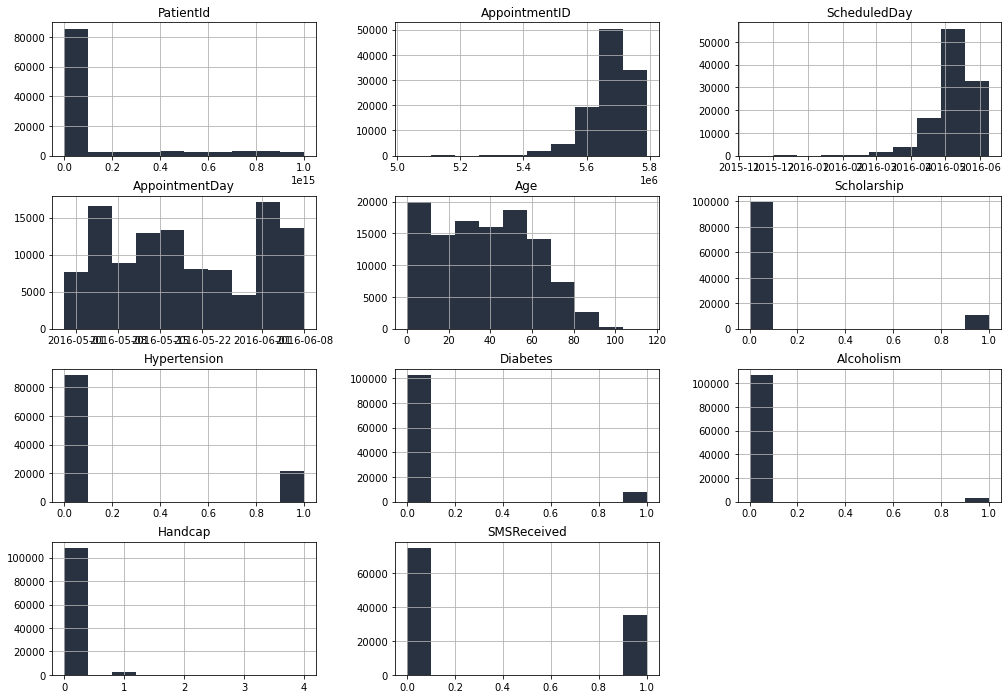

In [10]:
df.hist(figsize=(17,12) ,color="#293241");

### Research Question 1 - What is the overall No_Show appointements rate based on gender?

In [11]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
showed = df.NoShow == 'No'
NotShowed = df.NoShow == 'Yes'

In [12]:
df[showed].count()

PatientId         88207
AppointmentID     88207
Gender            88207
ScheduledDay      88207
AppointmentDay    88207
Age               88207
Neighbourhood     88207
Scholarship       88207
Hypertension      88207
Diabetes          88207
Alcoholism        88207
Handcap           88207
SMSReceived       88207
NoShow            88207
dtype: int64

In [13]:
df[NotShowed].count()

PatientId         22319
AppointmentID     22319
Gender            22319
ScheduledDay      22319
AppointmentDay    22319
Age               22319
Neighbourhood     22319
Scholarship       22319
Hypertension      22319
Diabetes          22319
Alcoholism        22319
Handcap           22319
SMSReceived       22319
NoShow            22319
dtype: int64

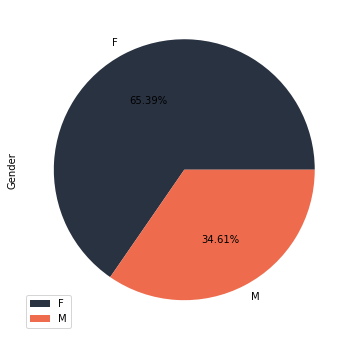

In [20]:
def notshowedbyvariale(df,column,noshow) :
    plt.figure(figsize=[15,6])
    df[column][noshow].value_counts(normalize=True).plot(kind='pie' , colors=['#293241','#ee6c4d'], autopct='%.2f%%')
    plt.legend();
notshowedbyvariale(df,'Gender',NotShowed) 
#labels=['Female' ,'Male'] ,
#label ='No Show' ,

As showen in the pie chart above, we can find that the percentage of Females patients who did not showed on their aporintements is 65.39% . Where the percentage of Males patients who did not showed on their aporintements is 34.61%.

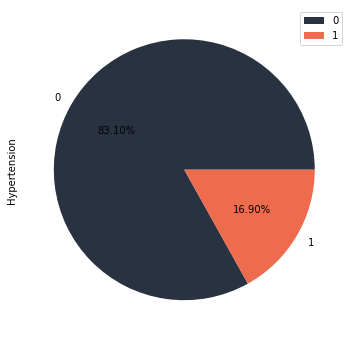

In [21]:
notshowedbyvariale(df,'Hypertension',NotShowed) 


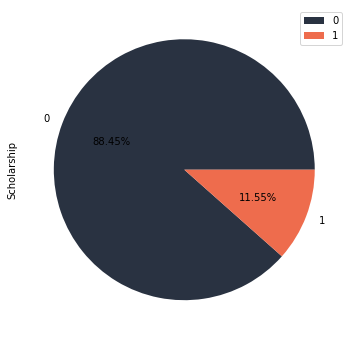

In [22]:
notshowedbyvariale(df,'Scholarship',NotShowed) 


In [24]:
dfgender=df.groupby('Gender')['NoShow'].value_counts(normalize=True).mul(100).round(2).unstack()
dfgender

NoShow,No,Yes
Gender,,
F,79.69,20.31
M,80.03,19.97


<AxesSubplot:title={'center':'Percentage of Show/No Show appointements per gender'}, xlabel='Gender', ylabel='Percentage'>

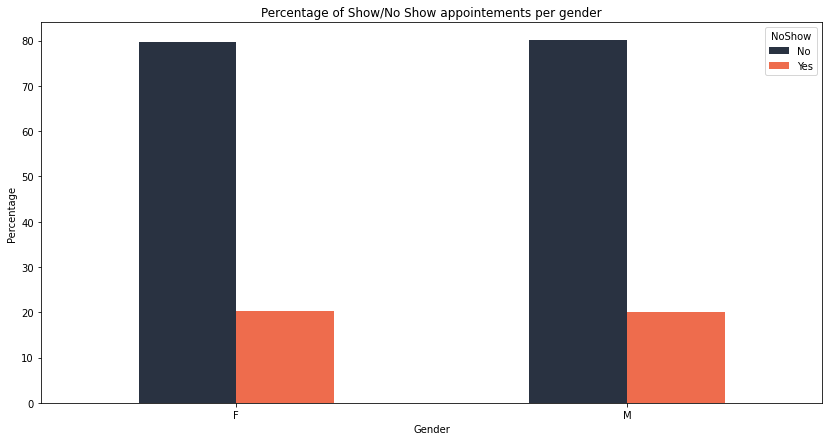

In [46]:
dfgender.plot(kind='bar',figsize=[14,7],color=['#293241','#ee6c4d'],title='Percentage of Show/No Show appointements per gender',ylabel="Percentage",rot=0)

>Looking at the chart above, we can find that the females and males have the same percentage of patients who did not attends appointements 

### Research Question 2 - What is the most committed age range to attend appointments?

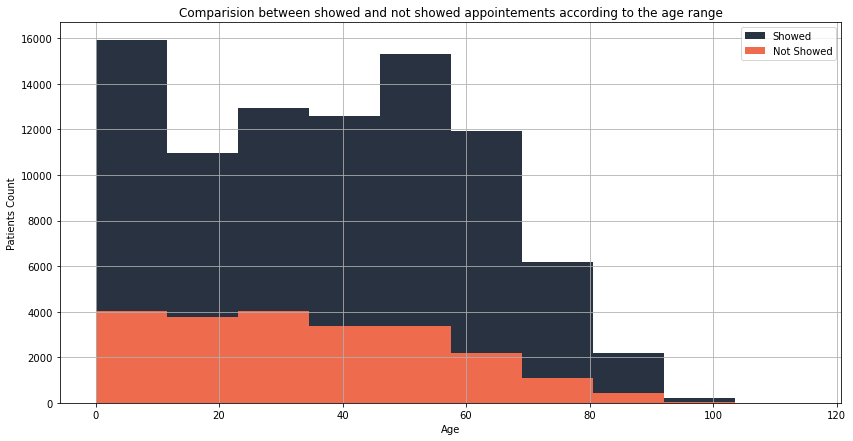

In [15]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
plt.figure(figsize=[14,7])
df.Age[showed].hist(label='Showed' , color="#293241")
df.Age[NotShowed].hist(label='Not Showed',color="#ee6c4d")
plt.legend()
plt.title("Comparision between showed and not showed appointements according to the age range")
plt.xlabel("Age")
plt.ylabel("Patients Count");

>Looking at the chart above, we can find that the highest appointment proportion where patients attend their appoitements are from the age range (0-10) , where the lowest proportion of appointments where patients attend their appointements are from the age range (80 - 115)

<a id='conclusions'></a>
## Conclusions

> - We can find that the highest appointment proportion where patients attend their appoitements are from the age range (0-10) , where the lowest proportion of appointments where patients attend their appointements are from the age range (80 - 115).
> - We can notice that the highest attendance of patients for their appointments are patients in the age range (0-10).This may be because patients at this age are under the care of their parents.
>-Female patients have the highest rate of not attending their appointments with 65% of over all rate . While males have 34% of over all not attending rate .
>-When we dig further, we find that both men and women have the same percentage of people who don't show up for appointments which is 20%, despite the fact that females have a higher overall rate than males. and that's because there are more female patients than male patients.So attending appointments is not much impacted by gender

>**Limitations**
>- Most of the data is catigoral which made it harder to compare and perfome calculations.
>-Some wrong data wich effect the results . for example the age <0 .
## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [47]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1